# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data
import os
import pickle
import numpy as np
from zipfile import ZipFile


# TODO: Fill this in based on where you saved the training and testing data
with ZipFile('traffic-signs-data.zip','r') as zipf:
    zipf.extractall()
    for filename in zipf.namelist( ):
        
        if (filename == 'train.p'):
            training_file = filename
                 
        elif (filename == 'test.p'):
            testing_file = filename
        else:
            validation_file = filename

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results
n_train = len(X_train)

# TODO: Number of testing examples.
n_test = len(X_test)

assert(len(X_train) == len(y_train))
assert(len(X_valid) == len(y_valid))
assert(len(X_test) == len(y_test))

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = np.unique(y_train).shape[0]

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

25
(34799, 32, 32, 3)


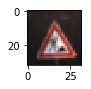

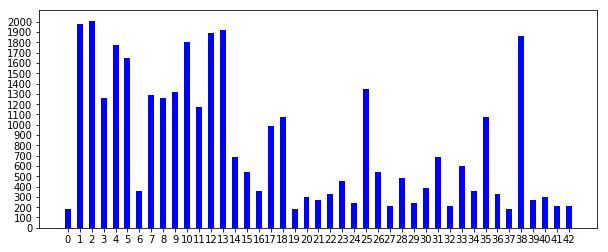

In [3]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
#import plotly.plotly as py
import random
%matplotlib inline
index = random.randint(0, len(X_train))
image = X_train[index].squeeze()

plt.figure(figsize=(1,1))
plt.imshow(image)
print(y_train[index])
print(X_train.shape)
#print(len(y_train))
y_temp = np.array(y_train)

x, y = np.unique(y_temp,return_counts=True)
width = .50
fig, ax = plt.subplots(figsize=(10,4))

ax.bar(x, y, width, color="blue")
plt.xticks(np.arange(0,len(y),1))
plt.yticks(np.arange(0,max(y),100))


plt.show()
#plot_url = py.plot_mpl(fig)



----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Pre-process the Data Set (normalization, grayscale, etc.)

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

Image data shape = (34799, 32, 32, 1)
Valid Image data shape = (4410, 32, 32, 1)
Test Image data shape = (12630, 32, 32, 1)
41


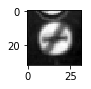

In [4]:
### Preprocess the data here. Preprocessing steps could include normalization, converting to grayscale, etc.
### Feel free to use as many code cells as needed.
import matplotlib.image as mpimg
import cv2
from sklearn.utils import shuffle
kernel_size = 3
a = .1
b = .9
min_data = 0
max_data = 255
#blur_gray = cv2.GaussianBlur(gray,(kernel_size, kernel_size), 0)
X_train_gray_norm = []
X_valid_gray_norm = []
X_test_gray_norm = []

def convert_into_gray_n_nor(img):
    #converting image into gray scale
    image = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    #normalizing the image
    norm = a + ((image - min_data)*(b - a)/(max_data - min_data))
    return norm

#appending the normalized image

for img in X_train:
    X_train_gray_norm.append(convert_into_gray_n_nor(img))
for img in X_valid:
    X_valid_gray_norm.append(convert_into_gray_n_nor(img))
for img in X_test:
    X_test_gray_norm.append(convert_into_gray_n_nor(img))

#coverting into numpy array
X_train_gray_norm = np.array(X_train_gray_norm)
X_valid_gray_norm = np.array(X_valid_gray_norm)
X_test_gray_norm = np.array(X_test_gray_norm)

# changing shape as input image
X_train_gray_norm = np.expand_dims(X_train_gray_norm, axis=3)
X_valid_gray_norm = np.expand_dims(X_valid_gray_norm,axis=3)
X_test_gray_norm = np.expand_dims(X_test_gray_norm,axis=3)

print("Image data shape =", X_train_gray_norm.shape)
print("Valid Image data shape =", X_valid_gray_norm.shape)
print("Test Image data shape =", X_test_gray_norm.shape)

#printing shape and ploting image to confirm

image = X_train_gray_norm[10].squeeze()

plt.figure(figsize=(1,1))
plt.imshow(image,cmap='gray')
print(y_train[10])

### Image augmentation

Equal distribution of each type of trafic image, in train data

X, y shapes After augmentation: (39239, 32, 32, 1) (39239,)


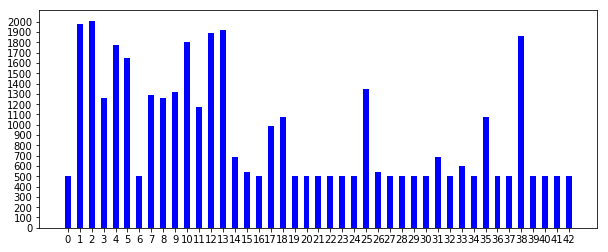

In [5]:
# image augmentation
def blure_img(img):
    image = cv2.GaussianBlur(img,(kernel_size, kernel_size), 0)
    image = image[:,:,np.newaxis]
    return image

def rotation_image(img):
    rows = 32
    cols = 32
    M = cv2.getRotationMatrix2D((cols/2,rows/2),2,1)
    dst = cv2.warpAffine(img,M,(cols,rows))
    dst = dst[:,:,np.newaxis]
    return dst
                         
def image_translate(img):
    width,height,_ = img.shape
    
    # allow translation up to px pixels in x and y directions
    px = 2
    x, y = np.random.randint(-px,px,2)
    Mat = np.float32([[1,0,x],[0,1,y]])
    destination = cv2.warpAffine(img,Mat,(height,width))
    destination = destination[:,:,np.newaxis]
    return destination
#print('X, y shapes:', X_train_gray.shape, y_train.shape[0])

input_indices = []
output_indices = []

for class_n in range(n_classes):
    #print(class_n, ': ', end='')
    class_indices = np.where(y_train == class_n)
    n_samples = len(class_indices[0])
    if n_samples < 500:
        for i in range(500 - n_samples):
            #print(X_train_gray_norm.shape[0])
            input_indices.append(class_indices[0][i%n_samples])
            output_indices.append(X_train_gray_norm.shape[0])
            new_img = X_train_gray_norm[class_indices[0][i % n_samples]]
            new_img = image_translate(rotation_image(blure_img(new_img)))
            X_train_gray_norm = np.concatenate((X_train_gray_norm, [new_img]), axis=0)
            y_train = np.concatenate((y_train, [class_n]), axis=0)

print('X, y shapes After augmentation:', X_train_gray_norm.shape, y_train.shape)

y_temp = np.array(y_train)

x, y = np.unique(y_temp,return_counts=True)
width = .50
fig, ax = plt.subplots(figsize=(10,4))

ax.bar(x, y, width, color="blue")
plt.xticks(np.arange(0,len(y),1))
plt.yticks(np.arange(0,max(y),100))


plt.show()
    

In [6]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
### Define your architecture here.
### Feel free to use as many code cells as needed.
import tensorflow as tf
from sklearn.utils import shuffle
from tensorflow.contrib.layers import flatten

EPOCHS = 200
BATCH_SIZE = 128
dropout = 0.5
from tensorflow.contrib.layers import flatten
weights = {
    'wc1': tf.Variable(tf.truncated_normal([5, 5, 1, 6], mean=0.0, stddev= .1)),
    'wc2': tf.Variable(tf.truncated_normal([5, 5, 6, 16], mean=0.0, stddev=.1)),
    'wc3': tf.Variable(tf.truncated_normal([2, 2, 16, 120], mean=0.0, stddev=.1)),
    'wd1': tf.Variable(tf.truncated_normal([2056, 84], mean=0.0, stddev=.1)),
    #'wd2': tf.Variable(tf.truncated_normal([128, 84], mean=0.0, stddev=.1)),
    'out': tf.Variable(tf.truncated_normal([84, 43], mean=0.0, stddev=.1))}

biases = {
    'bc1': tf.Variable(tf.truncated_normal([6], mean=0.0, stddev= .1)),
    'bc2': tf.Variable(tf.truncated_normal([16], mean=0.0, stddev= .1)),
    'bc3': tf.Variable(tf.truncated_normal([120], mean=0.0, stddev= .1)),
    'bd1': tf.Variable(tf.truncated_normal([84], mean=0.0, stddev= .1)),
    #'bd2': tf.Variable(tf.truncated_normal([84], mean=0.0, stddev= .1)),
    'out': tf.Variable(tf.truncated_normal([43], mean=0.0, stddev= .1))}

def conv2d(x, W, b, strides=1):
    x = tf.nn.conv2d(x, W, strides=[1, strides, strides, 1], padding='VALID')
    x = tf.nn.bias_add(x, b)
    return tf.nn.relu(x)

def maxpool2d(x, k=2):
    return tf.nn.max_pool(
        x,
        ksize=[1, k, k, 1],
        strides=[1, k, k, 1],
        padding='VALID')



def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # TODO: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1 = conv2d(x, weights['wc1'], biases['bc1'])
    

    # TODO: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = maxpool2d(conv1, k=2)
    
    
    pool1 = flatten(conv1)
    
    print('pool2:', pool1 )
    
    # TODO: Layer 2: Convolutional. Output = 10x10x16.
    conv2 = conv2d(conv1, weights['wc2'], biases['bc2'])
    
    # TODO: Activation.

    # TODO: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = maxpool2d(conv2, k=2)
    
    pool2 = flatten(conv2)
    
    print('pool2:', pool2 )
    
    #conv3 layer
    conv3 = conv2d(conv2, weights['wc3'], biases['bc3'])
    #maxpool
    conv3 = maxpool2d(conv3, k=2)
    pool3 = flatten(conv3)
    
    print('pool3:', pool3 )

    
    flattend = tf.concat(1,[pool1, pool2,pool3])
    
    print('flattend: ',flattend )
    #Fully connected layer one

    fc1 = tf.add(tf.matmul(flattend, weights['wd1']), biases['bd1'])
    fc1 = tf.nn.relu(fc1)
    fc1 = tf.nn.dropout(fc1, keep_prob)
    
 
    logits = tf.add(tf.matmul(fc1, weights['out']), biases['out'])
   
    return logits

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the test set but low accuracy on the validation set implies overfitting.

In [7]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.
# This is place holder for input and output

from skimage import transform, filters, exposure
import random
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
#x = tf.placeholder(tf.int32, (None, 32, 32, 1))
#y = tf.placeholder(tf.float32, (None))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)
keep_prob = tf.placeholder(tf.float32)

#training models
val_acc = []

rate = 0.001

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

# Accuracy calculation
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y,keep_prob:0.5})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

### Training models

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train_gray_norm)
    print(num_examples)
    #print(len(X_valid))
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train_gray_norm, y_train = shuffle(X_train_gray_norm, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train_gray_norm[offset:end], y_train[offset:end]
            #aug_batch_x = augmented_image(batch_x)
                                
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y,keep_prob: .5})
            
        validation_accuracy = evaluate(X_valid_gray_norm, y_valid)
        val_acc.append(validation_accuracy)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './lenet')
    print("Model saved")

pool2: Tensor("Flatten/Reshape:0", shape=(?, 1176), dtype=float32)
pool2: Tensor("Flatten_1/Reshape:0", shape=(?, 400), dtype=float32)
pool3: Tensor("Flatten_2/Reshape:0", shape=(?, 480), dtype=float32)
flattend:  Tensor("concat:0", shape=(?, 2056), dtype=float32)
39239
Training...

EPOCH 1 ...
Validation Accuracy = 0.494

EPOCH 2 ...
Validation Accuracy = 0.658

EPOCH 3 ...
Validation Accuracy = 0.736

EPOCH 4 ...
Validation Accuracy = 0.772

EPOCH 5 ...
Validation Accuracy = 0.787

EPOCH 6 ...
Validation Accuracy = 0.788

EPOCH 7 ...
Validation Accuracy = 0.817

EPOCH 8 ...
Validation Accuracy = 0.828

EPOCH 9 ...
Validation Accuracy = 0.835

EPOCH 10 ...
Validation Accuracy = 0.858

EPOCH 11 ...
Validation Accuracy = 0.862

EPOCH 12 ...
Validation Accuracy = 0.854

EPOCH 13 ...
Validation Accuracy = 0.864

EPOCH 14 ...
Validation Accuracy = 0.859

EPOCH 15 ...
Validation Accuracy = 0.875

EPOCH 16 ...
Validation Accuracy = 0.875

EPOCH 17 ...
Validation Accuracy = 0.885

EPOCH 18 ..

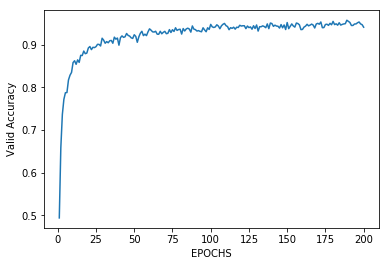

In [8]:
# ploting validation accuracy vs EPOCH

test_epoch = []
for i in range(len(val_acc)):
        #x_epoch = np.array([i+1])
        test_epoch.append(i+1)
plt.xlabel('EPOCHS')
plt.ylabel('Valid Accuracy')
plt.plot(test_epoch,val_acc)
plt.show()





###  Testing a Model on test set data

In [9]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    test_data_accuracy = evaluate(X_test_gray_norm, y_test)
    print("EPOCH {} ...".format(i+1))
    print("Test Accuracy = {:.3f}".format(test_data_accuracy))
    print()
    
    

EPOCH 200 ...
Test Accuracy = 0.919



---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

(5, 32, 32, 1)


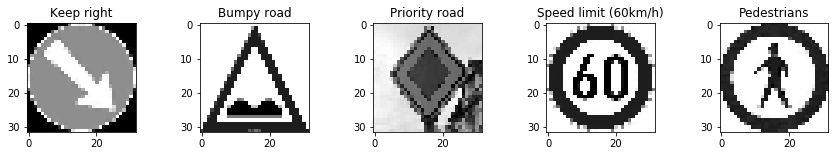

In [10]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import csv
import os
from itertools import islice

list_of_images_name = os.listdir("My_Found_Traffic_Sign/")
ger_trafics_data = []
ger_trafics_gray_norm_data = []
os.chdir('My_Found_Traffic_Sign/')
result = {}
#sks: ger_trafic_lebel = [27,14,1,38,25]
ger_trafic_lebel = [38,22,12,3,27]


# creating lables for the data

    

for name in list_of_images_name:
    img = cv2.imread(name)
    res = cv2.resize(img,(32, 32), interpolation = cv2.INTER_CUBIC)
    ger_trafics_data.append(res)

os.chdir('../')

#coverting images into gray scale and normalized.
for i in range(len(ger_trafics_data)):
    norm = convert_into_gray_n_nor(ger_trafics_data[i])
    ger_trafics_gray_norm_data.append(norm)
ger_trafics_gray_norm_data = np.array(ger_trafics_gray_norm_data)
ger_trafics_gray_norm_data = np.expand_dims(ger_trafics_gray_norm_data, axis=3)

print(ger_trafics_gray_norm_data.shape)    
    



with open('signnames.csv', 'r') as f:
    reader = csv.reader(f,skipinitialspace=True, quotechar="'")
    #print(temp)
    for row in islice(reader, 1, None):
        result[int(row[0])]=row[1:]

    #for rows in islice(reader, 1)
    #result = {rows[0]:rows[1] for rows in islice(reader, 1, None)}

#converting into numpy array and add dimension

#fig,axs = plt.subplots((1,5), figsize=(15,2))
fig, axs = plt.subplots(1,5, figsize=(15, 2))
for i in range(len(ger_trafics_gray_norm_data)):
    axs[i].imshow(ger_trafics_gray_norm_data[i].squeeze(), cmap='gray')
    axs[i].set_title(str(result[ger_trafic_lebel[i]][0]))


### Predict the Sign Type for Each Image

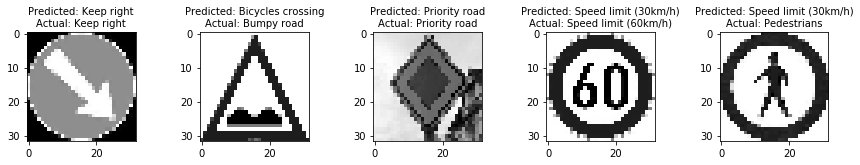

In [11]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    test_accuracy = evaluate(ger_trafics_gray_norm_data, ger_trafic_lebel)
    #Get top 1 predicted class for each image
    output = sess.run(tf.nn.top_k(tf.nn.softmax(logits), 1),feed_dict={x: ger_trafics_gray_norm_data, keep_prob:1.0})
    predicts = np.array(output[1])
    
    #Plotting the Graph 
    fig, axs = plt.subplots(1,5, figsize=(15, 2))
    for i in range(len(ger_trafics_gray_norm_data)):
        axs[i].imshow(ger_trafics_gray_norm_data[i].squeeze(), cmap='gray')
        axs[i].set_title("Predicted: " + str(result[predicts[i][0]][0]) \
                         + "\nActual: " + str(result[ger_trafic_lebel[i]][0]), fontsize=10)



### Analyze Performance

In [12]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.
print("Test Accuracy = {:.1f}".format(test_accuracy))

Test Accuracy = 0.4


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [13]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    output = sess.run(tf.nn.top_k(tf.nn.softmax(logits), 5),feed_dict={x: ger_trafics_gray_norm_data, keep_prob:1.0})
    
    for i in range(len(output[0])):
        print("Image {0}:({1})".format(i+1, result[ger_trafic_lebel[i]][0]))
        print("Top 5 probabilites: {0}".format(output[0][i]))
        print("Top 5 indexes: {0}".format(output[1][i]))
        print()


Image 1:(Keep right)
Top 5 probabilites: [ 1.  0.  0.  0.  0.]
Top 5 indexes: [38  0  1  2  3]

Image 2:(Bumpy road)
Top 5 probabilites: [  1.00000000e+00   2.03861853e-23   2.16752687e-29   2.08920319e-36
   6.71768078e-38]
Top 5 indexes: [29 25 24 34 30]

Image 3:(Priority road)
Top 5 probabilites: [  1.00000000e+00   2.73889671e-26   5.66895034e-31   9.07308804e-34
   0.00000000e+00]
Top 5 indexes: [12 40 13 38  0]

Image 4:(Speed limit (60km/h))
Top 5 probabilites: [  1.00000000e+00   7.68474528e-09   4.94167651e-10   1.83105769e-13
   1.96619026e-15]
Top 5 indexes: [ 1  2  7  5 11]

Image 5:(Pedestrians)
Top 5 probabilites: [  9.99789774e-01   2.09521429e-04   4.95377947e-07   2.85196336e-07
   3.95742224e-11]
Top 5 indexes: [ 1  5 25 18 11]



> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the IPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 